# 01_Introduction of Statistics_with R
---

# 참고자료) 누구나 통계 with R

## 1장 R을 가지고 놀아 보자

### 1.1 R이란

### 1.2 간단한 계산

### 1.3 도움말과 종료

### 1.4 데이터 입력

In [16]:
신장 = c(168.5, 172.8, 159.0)
체중 = c(69.5, 75.0, 56.5)

체중 / (신장 / 100)^2

[1] 24.47851 25.11735 22.34880

In [18]:
round(체중 / (신장 / 100)^2, 1)

[1] 24.5 25.1 22.3

### 1.5 데이터 프레임

In [20]:
신장 = c(168.5, 172.8, 159.0)
체중 = c(69.5, 75.0, 56.5)
X = data.frame(신장, 체중)
X

신장,체중
<dbl>,<dbl>
168.5,69.5
172.8,75.0
159.0,56.5


In [23]:
row.names(X) = c("철수", "민수", "영희")
X

,신장,체중
,<dbl>,<dbl>
철수,168.5,69.5
민수,172.8,75.0
영희,159.0,56.5


In [24]:
X$`신장`

[1] 168.5 172.8 159.0

In [27]:
X$성별=c("M", "M", "F")
X

,신장,체중,성별
,<dbl>,<dbl>,<chr>
철수,168.5,69.5,M
민수,172.8,75.0,M
영희,159.0,56.5,F


In [28]:
X$BMI = round(X$체중 / (X$신장 / 100)^2)
X

,신장,체중,성별,BMI
,<dbl>,<dbl>,<chr>,<dbl>
철수,168.5,69.5,M,24
민수,172.8,75.0,M,25
영희,159.0,56.5,F,22


### 1.6 파일 읽기 쓰기와 문자 코드

In [33]:
write.csv(X, "X.csv", quote=FALSE, row.names=FALSE, fileEncoding="CP949", eol="\r\n")

In [35]:
Y = read.csv("X.csv", fileEncoding="CP949")
Y

신장,체중,성별,BMI
<dbl>,<dbl>,<fct>,<int>
168.5,69.5,M,24
172.8,75.0,M,25
159.0,56.5,F,22


### 1.7 그림을 그리는 방법

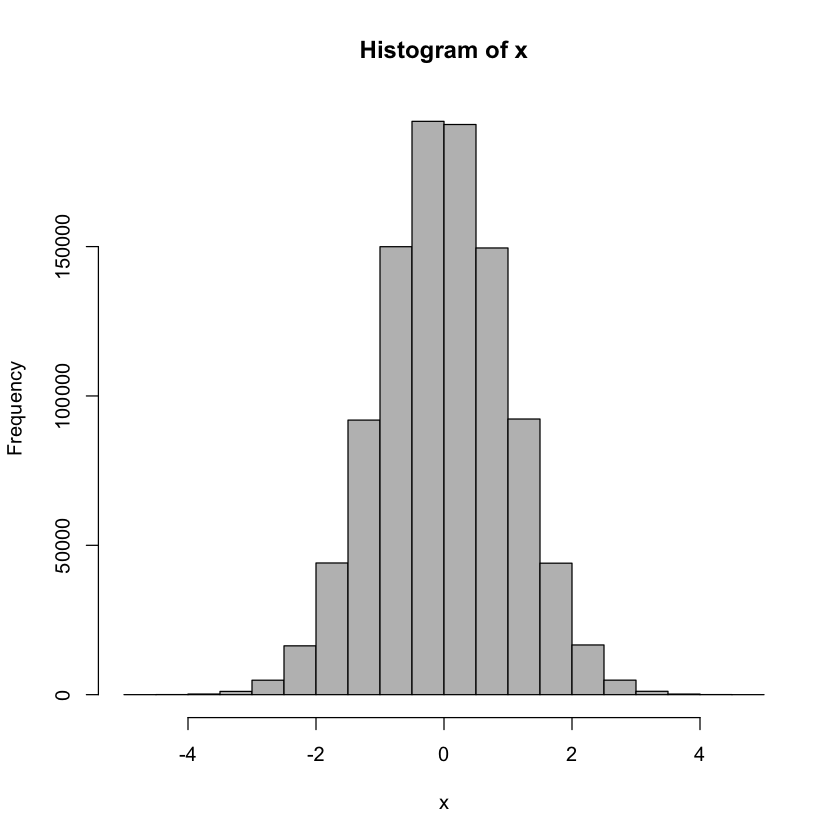

In [51]:
# par(family = "NanumGothic")
x = rnorm(1000000)
hist(x, col="gray")

### 1.8 패키지 예：Excel 파일 읽기

In [55]:
# install.packages("readxl")
library(readxl)

x <- read_excel("test.xlsx")

----

## 2장 통계 기초

### 2.1 데이터의 척도

### 2.2 대푯값

In [57]:
X = c(0, 7, 8, 9, 100)
mean(X)

[1] 24.8

In [58]:
Y = c(0, 7, 8, NA, 0/0)
mean(Y)

[1] NA

In [59]:
mean(Y, na.rm=TRUE)  # NA도 NaN도 삭제한다

[1] 5

In [63]:
median(X)

[1] 8

### 2.3 확률변수, 난수, 모집단, 표본

In [64]:
X = c(1,2,3,4,5)
Y = c(5,3,1,8,9)

mean(2 * X + 3 * Y)

[1] 21.6

### 2.4 분산과 표준편차

In [71]:
X <- c(1,2,3,4,5)
Y <- c(5,3,1,3,5)
var(2 * X + 3 * Y)

[1] 35.2

In [72]:
4 * var(X) + 9 * var(Y)

[1] 35.2

In [73]:
x <- 1:5   # x = c(1,2,3,4,5)와 같음
var(x)    # n-1로 나누는 분산

[1] 2.5

In [74]:
var(c(2,3,4,5))  # 1을 뺀다
var(c(1,3,4,5))  # 2를 뺀다
var(c(1,2,4,5))  # 3을 뺀다
var(c(1,2,3,5))  # 4를 뺀다
var(c(1,2,3,4))  # 5를 뺀다

[1] 1.666667

[1] 2.916667

[1] 3.333333

[1] 2.916667

[1] 1.666667

In [75]:
mean(c(1.666667, 2.916667, 3.333333, 2.916667, 1.666667))

[1] 2.5

In [76]:
varp <- function(x) { var(x) * (length(x)-1) / length(x) }  # 함수를 만든다
varp(1:5)

[1] 2

In [77]:
x <- 1:10
sd(x)

[1] 3.02765

In [78]:
x = 1:9
quantile(x)  # 1 3 5 7 9
fivenum(x)   # 1 3 5 7 9

0%  25%  50%  75% 100% 
   1    3    5    7    9

[1] 1 3 5 7 9

### 2.5 중심극한정리와 정규분포

In [81]:
runif(1)

[1] 0.2587855

In [82]:
runif(10)

[1] 0.5123977 0.4544042 0.9225285 0.1784584 0.4883753 0.6561486 0.4036060
 [8] 0.8814260 0.4752492 0.3465812

In [83]:
X = runif(1000000)  # 100만 개의 난수

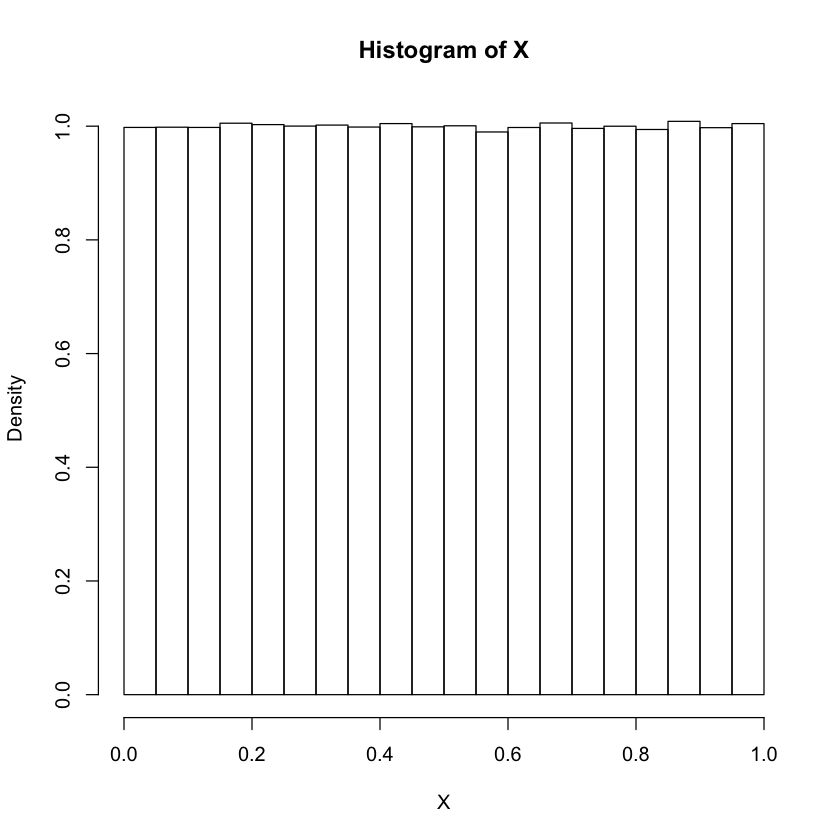

In [84]:
hist(X, freq=FALSE) # 히스토그램(도수분포도)을 그린다

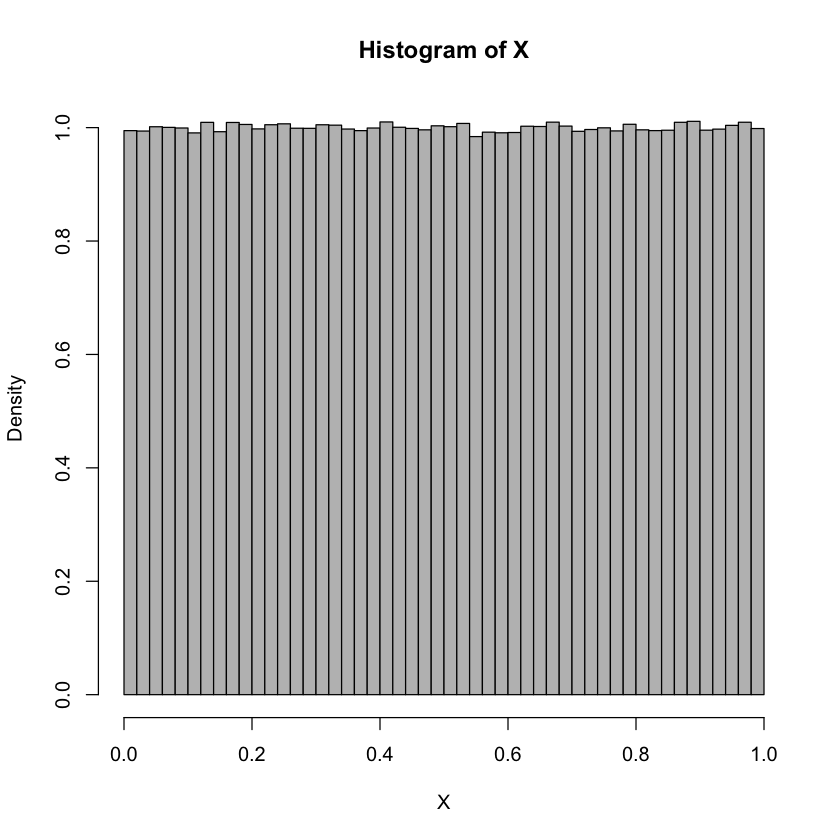

In [85]:
hist(X, freq=FALSE, col="gray", breaks=50)

In [86]:
X = runif(1000000) + runif(1000000)

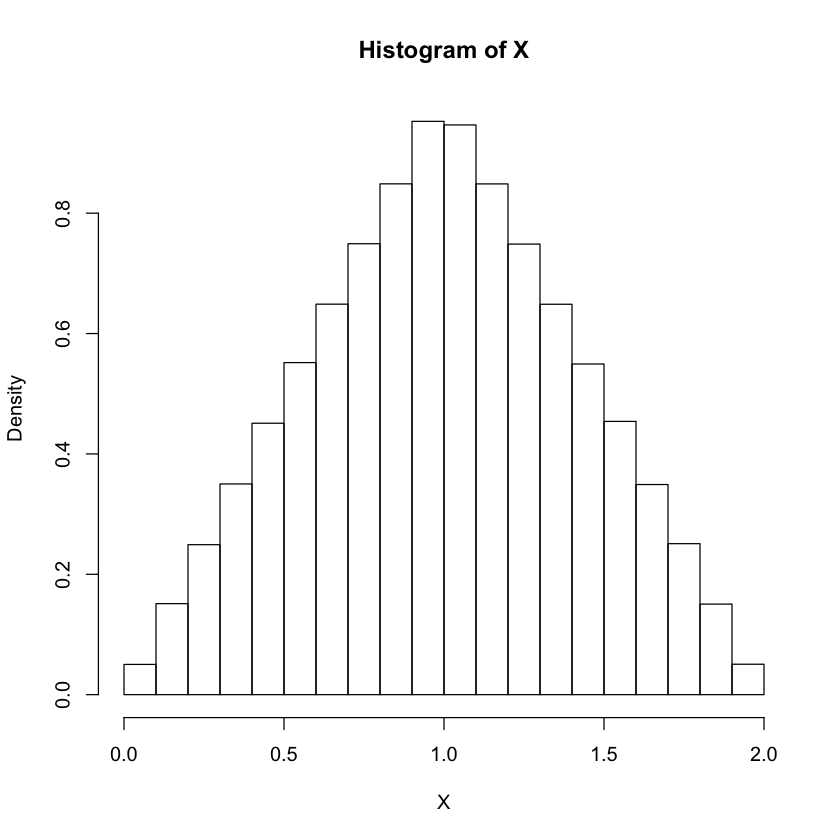

In [87]:
hist(X, freq=FALSE)

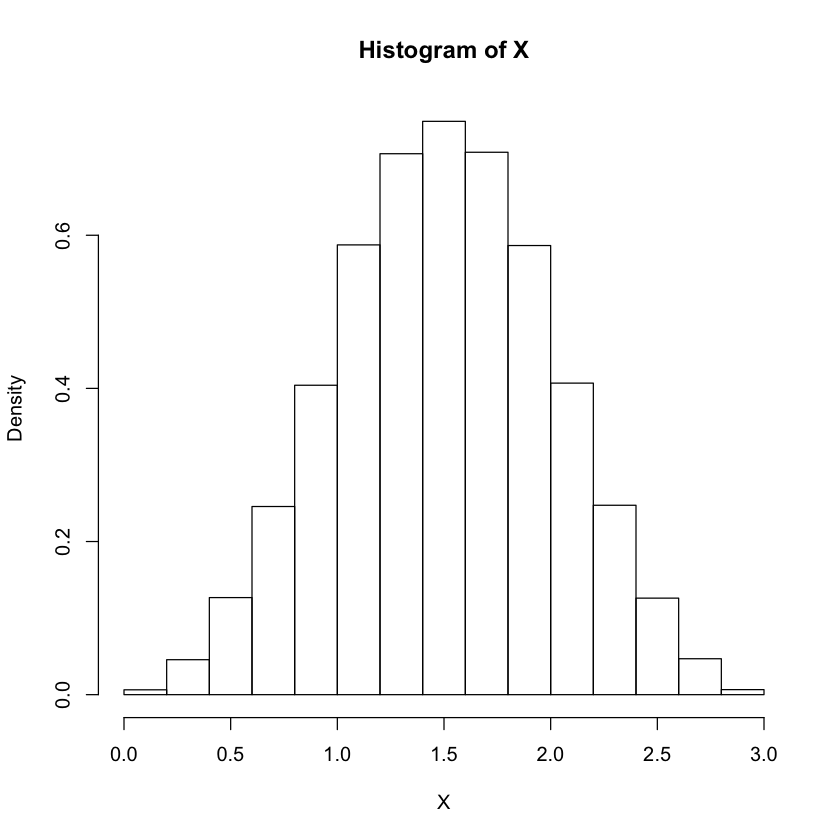

In [88]:
X = runif(1000000) + runif(1000000) + runif(1000000)
hist(X, freq=FALSE)

In [89]:
(1 / sqrt(2 * pi)) * exp(-x^2 / 2)

[1] 2.419707e-01 5.399097e-02 4.431848e-03 1.338302e-04 1.486720e-06
[6] 6.075883e-09 9.134720e-12 5.052271e-15 1.027977e-18

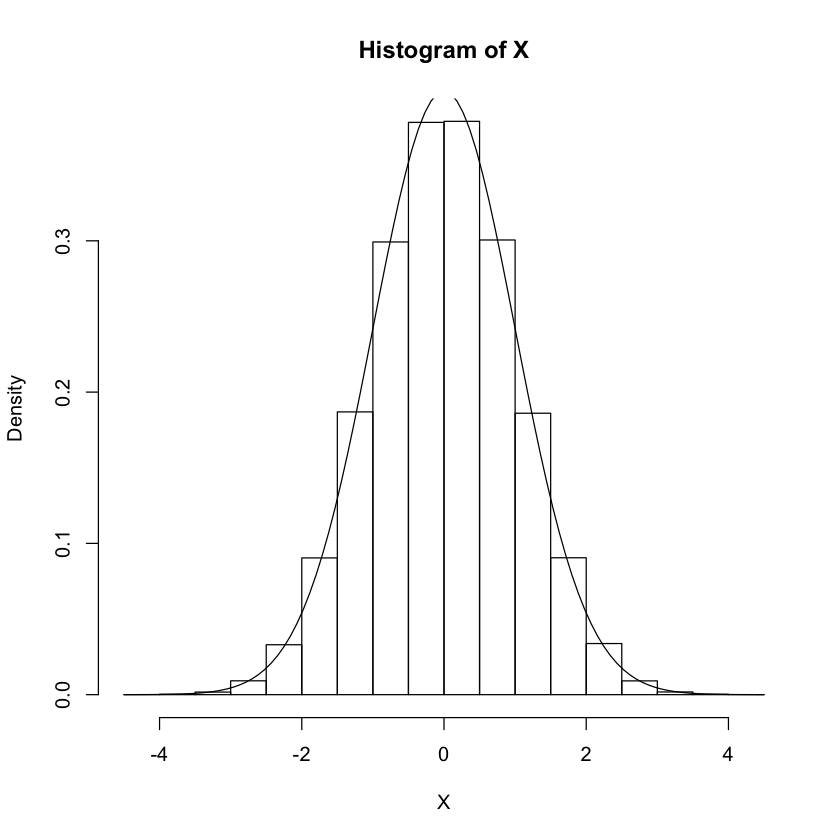

In [93]:
X = runif(1000000) + runif(1000000) + runif(1000000) + runif(1000000) +
runif(1000000) + runif(1000000) + runif(1000000) + runif(1000000) + 
runif(1000000) + runif(1000000) + runif(1000000) + runif(1000000) - 6  # 12
hist(X, freq=FALSE)
curve(dnorm(x), add=TRUE)

In [95]:
integrate(function(x){exp(-x^2/2)}, -Inf, +Inf)

sqrt(2 * pi)

2.506628 with absolute error < 0.00023

[1] 2.506628

In [96]:
pnorm(1) - pnorm(-1)

[1] 0.6826895

In [97]:
1 - 2 * pnorm(-1)

[1] 0.6826895

In [98]:
1 - 2 * pnorm(-2)

[1] 0.9544997

In [99]:
qnorm(0.975)

[1] 1.959964

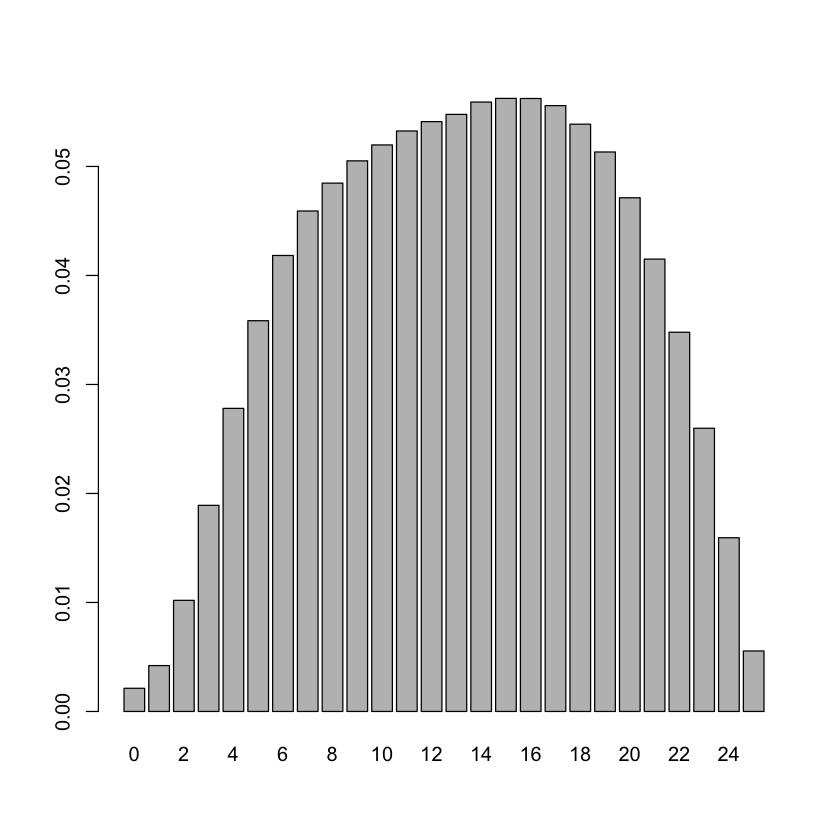

In [100]:
x = read.csv("data/rika_hist.csv")  #윈도 x = read.csv("data/rika_hist.csv", fileEncoding="utf-8")
n = sum(x$학생수)
barplot(x$학생수/n, names.arg=x$정답수)

### 2.6 코시분포

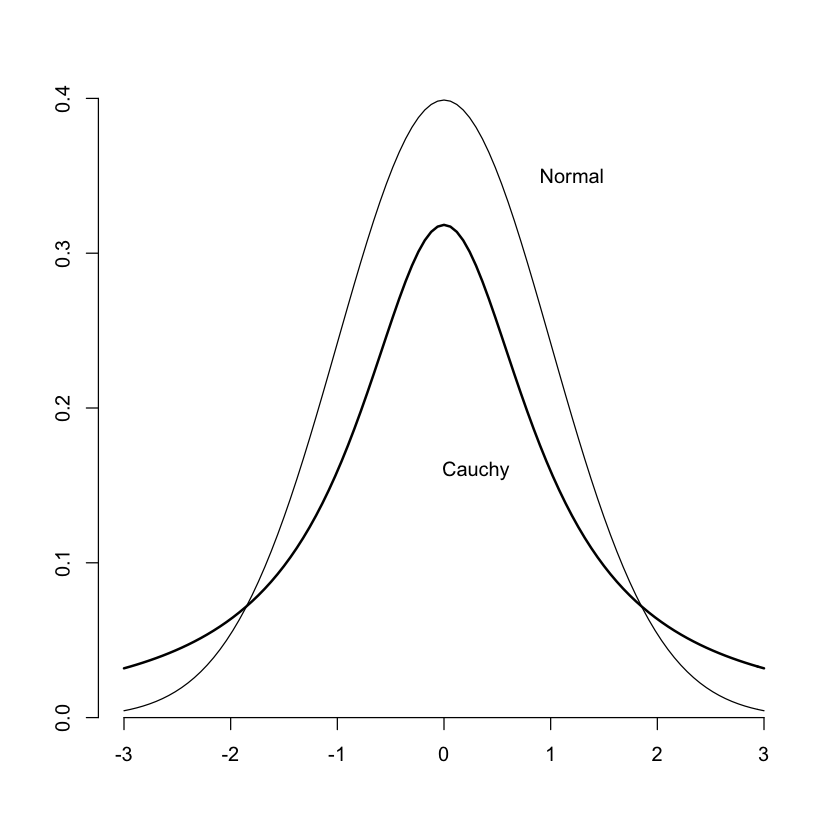

In [101]:
curve(dnorm(x), xlim=c(-3,3), ylim=c(0,0.4), xlab="", ylab="",
      frame.plot=FALSE, yaxs="i")
curve(dcauchy(x), lwd=2, add=TRUE)
text(0.3, 0.16, "Cauchy")
text(1.2, 0.35, "Normal")

### 2.7 정규분포에서 유도되는 분포